<img src='../img/EU-Copernicus-EUM-WEKEO_banner_logo.png' align='right' width='75%'></img>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_3_OLCI_coverage.ipynb"><< OLCI coverage</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_5_OLCI_plot_spectral_radiances_reflectances.ipynb">OLCI spectral plotting >></a>

Copernicus Marine Training Service <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://trainhub.eumetsat.int/ocean/sensors/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://img.shields.io/badge/Launch-TrainHub-Blue.svg" alt="Open in TrainHub"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://mybinder.org/v2/gl/eumetlab%2Focean%2Fsensors%2Flearn-olci/main?labpath=1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://colab.research.google.com/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://studiolab.sagemaker.aws/import/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://studiolab.sagemaker.aws/studiolab.svg" alt="Open In Studio Lab"/></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/eumetlab/ocean/sensors/learn-olci&urlpath=1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb&branch=main"><img src="https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft" alt="Open in Planetary Computer"/></a></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h1>Learn OLCI: Introductory</h1></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **[1_1_OLCI_data_access.ipynb](1_1_OLCI_data_access.ipynb)** (this will download the required OLCI products for this notebook)

It is recommended to go through these modules before you start with this module.
</div>
<hr>

<div class="alert alert-info" role="alert">

## OLCI spatial plotting (RGB)
    
</div>

### Learning outcomes

At the end of this notebook you will know;
* Objective


### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [heading](#tag)

<hr>

In [33]:
# library imports
import xarray as xr
import glob
import os
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import cartopy
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
# selecting SAFE directory
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3')

In [10]:
# Diagram of OLCI bands vs spectrum

In [11]:
grid_reduce = 5

In [12]:
geo_file = os.path.join(SAFE_directory,'geo_coordinates.nc')
geo_fid = xr.open_dataset(geo_file)
lon = geo_fid.longitude.data[::grid_reduce,::grid_reduce]
lat = geo_fid.latitude[::grid_reduce,::grid_reduce]
geo_fid.close()

In [27]:
band_files = sorted(glob.glob(os.path.join(SAFE_directory,'Oa*.nc')))
band_dict = {}
for band_file in band_files:
    band_fid = xr.open_dataset(band_file)
    band_var = os.path.basename(band_file).split('.')[0]
    print(band_var)
    band_dict[band_var] = band_fid.variables[band_var].data[::grid_reduce,::grid_reduce]
    band_fid.close()

Oa01_radiance
Oa02_radiance
Oa03_radiance
Oa04_radiance
Oa05_radiance
Oa06_radiance
Oa07_radiance
Oa08_radiance
Oa09_radiance
Oa10_radiance
Oa11_radiance
Oa12_radiance
Oa13_radiance
Oa14_radiance
Oa15_radiance
Oa16_radiance
Oa17_radiance
Oa18_radiance
Oa19_radiance
Oa20_radiance
Oa21_radiance


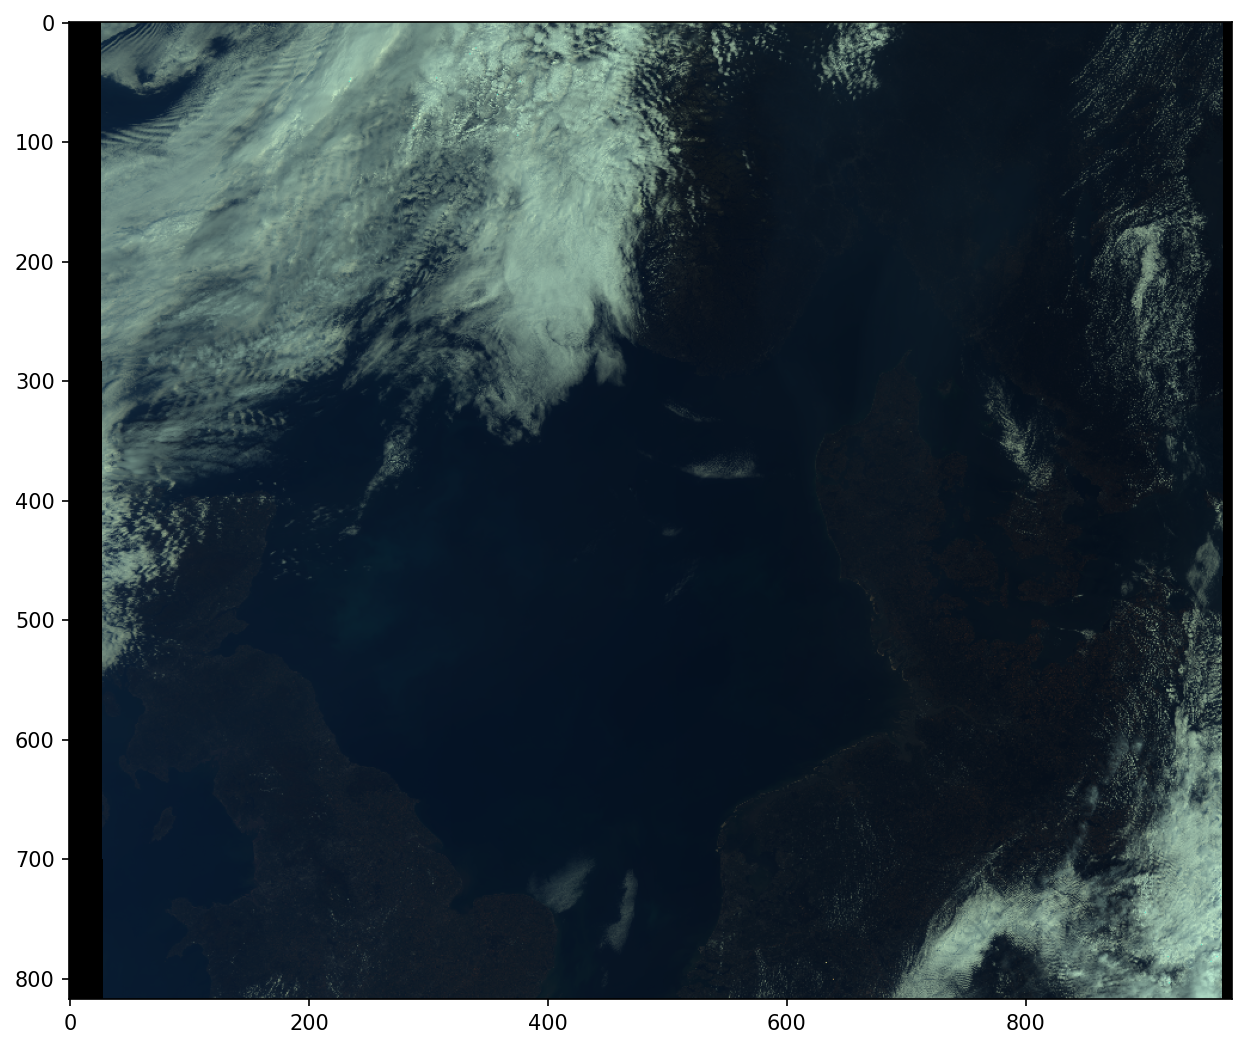

In [53]:
fig1 = plt.figure(figsize=(10, 10), dpi=150)
rgb = np.dstack((band_dict['Oa08_radiance'], band_dict['Oa05_radiance'], band_dict['Oa02_radiance']))
plt.imshow(rgb/np.nanmax(rgb))
plt.show()

In [ ]:
# improvements

<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean/">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>